In [30]:
import pywt
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./vehicle_palette.jpg')
img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [43]:
wavelet = pywt.Wavelet('haar')
levels  = np.int32(np.floor(np.log2(img_grayscale.shape[0])))
 
wvt_coeffs = pywt.wavedec2(img_grayscale, wavelet, level=levels)

noiseSigma = 16.0
noised_img = img_grayscale.copy()
noised_img += np.uint8(np.random.normal(0, noiseSigma, size=img_grayscale.shape))

threshold = noiseSigma * np.sqrt(2 * np.log2(img.size))

thresholded_coeffs = list(map(lambda x: pywt.threshold(x, threshold), wvt_coeffs))
denoised_img = pywt.waverec2(thresholded_coeffs, wavelet)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
contrast_encreased = clahe.apply(np.uint8(denoised_img))

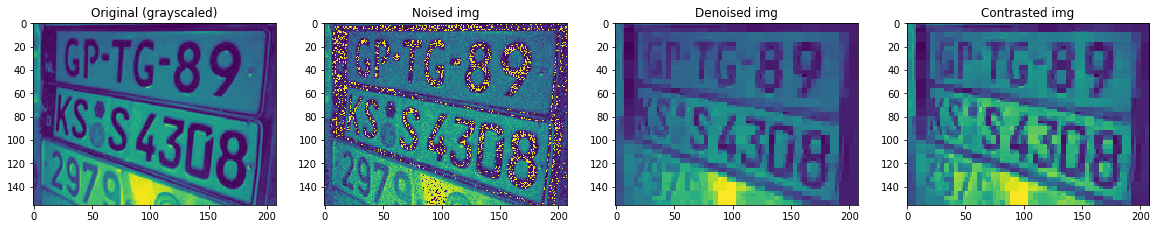

In [57]:
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 4, 1)
plt.title('Original (grayscaled)')
plt.imshow(img_grayscale)

fig.add_subplot(1, 4, 2)
plt.title('Noised img')
plt.imshow(noised_img)

fig.add_subplot(1, 4, 3)
plt.title('Denoised img')
plt.imshow(denoised_img)

fig.add_subplot(1, 4, 4)
plt.title('Contrasted img')
plt.imshow(contrast_encreased)

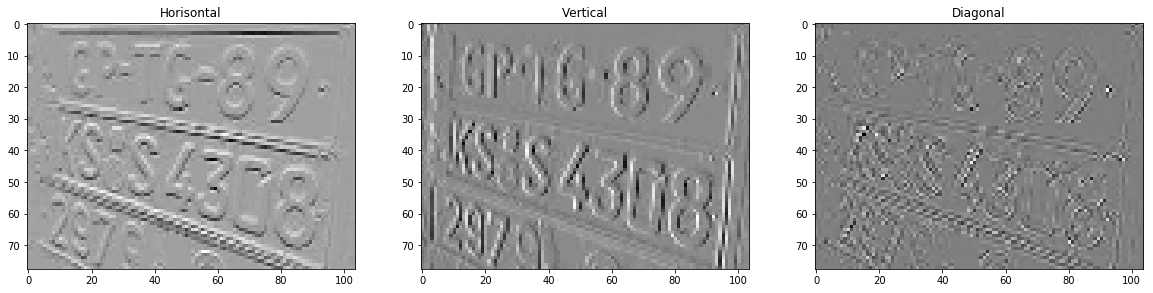

In [59]:
aprox, (h, v, d) = pywt.dwt2(img_grayscale, pywt.Wavelet('haar'))

fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 3, 1)
plt.title('Horisontal')
plt.imshow(h, cmap=plt.cm.gray)

fig.add_subplot(1, 3, 2)
plt.title('Vertical')
plt.imshow(v, cmap=plt.cm.gray)

fig.add_subplot(1, 3, 3)
plt.title('Diagonal')
plt.imshow(d, cmap=plt.cm.gray)